In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados_total = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursera ML Specialization/Desafio Visagio/Dataset_Treino.csv')

In [ ]:
dados_total.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso
0,1,19,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,7,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),LinkedIn,Noite,15/09/2022,0.0,123,1
1,2,21,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Não,Ainda não concluí um curso a distância,Eu prefiro cursos presenciais,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,15/09/2022,1.0,123,0
2,3,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Indicação de familiar,Manhã,15/09/2022,1.0,123,0
3,4,18,public,Ensino Médio concluído e não estudando,SP,Osasco,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,3.0,123,0
4,5,19,public,Ensino Médio concluído e não estudando,RJ,Rio de Janeiro,Não,Não,Sim e fiz parcialmente pelo computador e parci...,Não sei dizer,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação do iFood,Já concluí,15/09/2022,0.0,123,0


# Tratamento e escolha dos dados

Foram utilizadas apenas algumas das variáveis disponíveis e retirados as colunas que possuiam alguma informação faltante para efeito de simplificação e teste

In [ ]:
#dados_total.set_index('ID_Aluno', inplace=True)

In [ ]:
dados_total.sample()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso
2017,2891,17,public,Cursando o 3º ano do Ensino Médio,SP,Santa Isabel,Não,Sim,Ainda não concluí um curso a distância,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação na escola,Manhã,01/11/2022,0.0,76,1


In [ ]:
dados_total['Concluiu_EAD'].unique()

array(['SIm e fiz totalmente pelo celular',
       'Ainda não concluí um curso a distância',
       'Nunca realizei um curso a distância',
       'Sim e fiz parcialmente pelo computador e parcialmente pelo celular',
       'Sim e fiz totalmente pelo computador', nan], dtype=object)

In [ ]:
dados_total['Aprender_EAD'].unique()

array(['Muito eu tenho uma rotina definida para participar de cursos a distância',
       'Eu prefiro cursos presenciais', 'Não sei dizer', 'Quase nada'],
      dtype=object)

In [ ]:
dados_total['Renda_Familiar'].unique()

array(['Entre 2 e 3 salários mínimos (R$2.200 – R$3.300)',
       'Entre 1 e 2 salários mínimos (R$1.100 – R$2.200)',
       'Até 1 salário mínimo (até R$1.100)',
       'Mais que 5 salários mínimos (mais que R$5.500)',
       'Entre 3 e 4 salários mínimos (R$3.300 – R$4.400)',
       'Entre 4 e 5 salários mínimos (R$4.400 – R$5.500)'], dtype=object)

In [ ]:
dados_total['Horario_Estudando'].unique()

array(['Noite', 'Manhã', 'Já concluí', 'Integral', 'Tarde'], dtype=object)

In [ ]:
#Retirando exemplos que possuem valores nulos
dados_total = dados_total.dropna()

dados_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 0 to 3737
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Aluno                 3716 non-null   int64  
 1   Idade                    3716 non-null   int64  
 2   Tipo_escola              3716 non-null   object 
 3   Escolaridade             3716 non-null   object 
 4   Estado                   3716 non-null   object 
 5   Municipio                3716 non-null   object 
 6   Trabalhando              3716 non-null   object 
 7   Estudando                3716 non-null   object 
 8   Concluiu_EAD             3716 non-null   object 
 9   Aprender_EAD             3716 non-null   object 
 10  Recursos                 3716 non-null   object 
 11  Disponibilidade_Tutoria  3716 non-null   object 
 12  Disponibilidade_3_Meses  3716 non-null   object 
 13  Pessoas_Casa             3716 non-null   object 
 14  Renda_Familiar           3716

In [ ]:
dados = dados_total[['Idade','Tipo_escola','Escolaridade','Trabalhando','Estudando','Renda_Familiar','Pessoas_Casa','Abandono_curso']]
dados.sample(5)

,Idade,Tipo_escola,Escolaridade,Trabalhando,Estudando,Renda_Familiar,Pessoas_Casa,Abandono_curso
2238,19,public,Cursando o 3º ano do Ensino Médio,Não,Sim,Até 1 salário mínimo (até R$1.100),4,1
905,22,public,Cursando o 3º ano do Ensino Médio,Não,Não,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),3,1
2161,20,public,Cursando o 3º ano do Ensino Médio,Não,Não,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),4,1
2590,17,public,Cursando o 3º ano do Ensino Médio,Não,Sim,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),5,1
2960,17,public,Cursando o 3º ano do Ensino Médio,Sim,Sim,Até 1 salário mínimo (até R$1.100),4,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Supondo que 'dados_total' é o seu DataFrame original
dados = dados_total[['Idade', 'Tipo_escola', 'Escolaridade', 'Trabalhando', 'Estudando', 'Renda_Familiar', 'Pessoas_Casa', 'Abandono_curso']]

# Definindo quais colunas receberão cada tipo de tratamento
one_hot_cols = ['Tipo_escola', 'Escolaridade', 'Trabalhando', 'Estudando']
label_enc_cols = ['Idade', 'Renda_Familiar', 'Pessoas_Casa']

# Aplicando One-Hot Encoding
one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(dados[one_hot_cols]).toarray()
one_hot_labels = one_hot_encoder.get_feature_names_out(one_hot_cols)
dados_one_hot = pd.DataFrame(one_hot_encoded, columns=one_hot_labels)

# Aplicando Label Encoding
label_encoder = LabelEncoder()
for col in label_enc_cols:
    dados[col] = label_encoder.fit_transform(dados[col])

# Concatenando os dados tratados
dados_tratados = pd.concat([dados[label_enc_cols], dados_one_hot, dados['Abandono_curso']], axis=1)

# Exibindo o DataFrame tratado
dados_tratados = dados_tratados.dropna()
dados_tratados.head()

<ipython-input-13-628bcb795f64>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados[col] = label_encoder.fit_transform(dados[col])
<ipython-input-13-628bcb795f64>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados[col] = label_encoder.fit_transform(dados[col])
<ipython-input-13-628bcb795f64>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,Idade,Renda_Familiar,Pessoas_Casa,Tipo_escola_public,Tipo_escola_scholarship,Escolaridade_Cursando o 3º ano do Ensino Médio,Escolaridade_Cursando o Ensino Superior,Escolaridade_Ensino Médio concluído,Escolaridade_Ensino Médio concluído e não estudando,Escolaridade_Ensino Superior concluído,Trabalhando_Não,Trabalhando_Sim,Estudando_Não,Estudando_Sim,Abandono_curso
0,3.0,2.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,5.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


##Esses serão os dados utilizados para realizar os treinamentos


In [ ]:
X = dados_tratados.iloc[:, :-1]
y = dados_tratados.iloc[:, -1]
X.shape[1]

y= np.array(y)
y.shape

(3694,)

In [ ]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

In [ ]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

# Simple Tensorflow Method

Simple Model:
Training Set Classification Error: 0.2852
CV Set Classification Error: 0.2828
Test Set Classification Error: 0.2558

### Testando

In [ ]:
model = Sequential([
    tf.keras.Input(shape=(14,)),
    Dense(7, activation='relu', name = 'layer1'),
    Dense(1, activation='sigmoid', name = 'layer2')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 7)                 105       
                                                                 
 layer2 (Dense)              (None, 1)                 8         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(14, 7):
 [[ 0.33156013 -0.2116265  -0.1174345   0.05036086  0.19654435 -0.1599192
  -0.00836581]
 [ 0.50179154  0.5329426  -0.48446235 -0.24212113  0.07993996 -0.15033787
   0.49905235]
 [-0.06059036  0.09575862 -0.3912198   0.10908949 -0.45463884  0.5077793
  -0.0411202 ]
 [-0.09101912  0.25404632 -0.09388855 -0.2222434  -0.16513509  0.50810915
  -0.37405628]
 [ 0.28336406 -0.42257312 -0.0331375  -0.5069699   0.15978873 -0.2348615
  -0.21583903]
 [-0.44320223  0.50862426 -0.19432843 -0.44520098 -0.10311839 -0.47851104
   0.36513728]
 [-0.19775057  0.28029418 -0.36832124 -0.06508365  0.23076242  0.2504297
   0.19254094]
 [ 0.03370422 -0.0373109   0.01161718  0.3721633  -0.23817086 -0.07881072
  -0.21445554]
 [ 0.33872265  0.00254649  0.37996876 -0.16831753 -0.22237912  0.05564415
   0.5213037 ]
 [ 0.3603971  -0.31442642  0.39285767  0.23705095 -0.4615527   0.337116
   0.25107533]
 [ 0.50327593  0.3819921   0.21552002  0.42338628 -0.03352451 -0.3274572
   0.4078117 ]
 [-0.45017624  0

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)

model.fit(
    X,y,
    epochs=10,
)

Epoch 1/10
116/116 [==============================] - 1s 2ms/step - loss: 0.7174
Epoch 2/10
116/116 [==============================] - 0s 2ms/step - loss: 0.6044
Epoch 3/10
116/116 [==============================] - 0s 2ms/step - loss: 0.6006
Epoch 4/10
116/116 [==============================] - 0s 2ms/step - loss: 0.5984
Epoch 5/10
116/116 [==============================] - 0s 2ms/step - loss: 0.5970
Epoch 6/10
116/116 [==============================] - 0s 3ms/step - loss: 0.5953
Epoch 7/10
116/116 [==============================] - 0s 3ms/step - loss: 0.5951
Epoch 8/10
116/116 [==============================] - 0s 3ms/step - loss: 0.5936
Epoch 9/10
116/116 [==============================] - 0s 3ms/step - loss: 0.5933
Epoch 10/10
116/116 [==============================] - 0s 2ms/step - loss: 0.5932


In [ ]:
predictions = model.predict(np.array(X))
predictions

116/116 [==============================] - 0s 1ms/step


array([[0.74174625],
       [0.71238846],
       [0.7079218 ],
       ...,
       [0.70758915],
       [0.697199  ],
       [0.70865697]], dtype=float32)

In [ ]:
yhat = (predictions >= 0.71).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


### Criando uma função

In [ ]:
def simple_neural(X, y, act_hidden, act_output, threshold):
    model = Sequential([
    tf.keras.Input(shape=(14,)),
    Dense(7, activation=act_hidden, name = 'layer1'),
    Dense(1, activation=act_output, name = 'layer2')
    ])

    model.compile(
       loss = tf.keras.losses.BinaryCrossentropy(),
       optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    )
    model.fit(
       X,y,
       epochs=10,
    )

    return model


In [ ]:
model_1 = simple_neural(x_bc_train_scaled, y_bc_train,'relu','sigmoid',0.5)

threshold = 0.5

# Initialize lists that will contain the errors for each model
nn_train_error_simple = []
nn_cv_error_simple = []

# Record the fraction of misclassified examples for the training set
yhat = model_1.predict(x_bc_train_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
train_error = np.mean(yhat != y_bc_train)
nn_train_error_simple.append(train_error)

# Record the fraction of misclassified examples for the cross validation set
yhat = model_1.predict(x_bc_cv_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
cv_error = np.mean(yhat != y_bc_cv)
nn_cv_error_simple.append(cv_error)

print(
        f"Simple model: Training Set Classification Error: {nn_train_error_simple[0]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error_simple[0]:.5f}"
        )

Epoch 1/10
70/70 [==============================] - 1s 2ms/step - loss: 0.8248
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 0.7219
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 0.6672
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 0.6400
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 0.6253
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 0.6170
Epoch 7/10
70/70 [==============================] - 0s 2ms/step - loss: 0.6117
Epoch 8/10
70/70 [==============================] - 0s 2ms/step - loss: 0.6080
Epoch 9/10
70/70 [==============================] - 0s 2ms/step - loss: 0.6050
Epoch 10/10
24/24 [==============================] - 0s 1ms/step
Simple model: Training Set Classification Error: 0.28520, CV Set Classification Error: 0.28281


In [ ]:
# Compute the test error
yhat = model_1.predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error_simple = np.mean(yhat != y_bc_test)

print(f"Simple Model:")
print(f"Training Set Classification Error: {nn_train_error_simple[0]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error_simple[0]:.4f}")
print(f"Test Set Classification Error: {nn_test_error_simple:.4f}")

24/24 [==============================] - 0s 1ms/step
Simple Model:
Training Set Classification Error: 0.2852
CV Set Classification Error: 0.2828
Test Set Classification Error: 0.2558


# Testing 3 different architechtures

Selected Model: 3
Training Set Classification Error: 0.2852
CV Set Classification Error: 0.2828
Test Set Classification Error: 0.2558

In [ ]:
def neural_1(X, y, act_hidden, act_output, loss):
    model = Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    Dense(25, activation=act_hidden, name = 'layer1'),
    Dense(15, activation=act_hidden, name = 'layer2'),
    Dense(1, activation=act_output, name = 'layer3')
    ])

    model.compile(
       loss = loss,
       optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    )
    model.fit(
       X,y,
       epochs=50,
       verbose=0
    )

    return model

def neural_2(X, y, act_hidden, act_output, loss):
    model = Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    Dense(20, activation=act_hidden, name = 'layer1'),
    Dense(12, activation=act_hidden, name = 'layer2'),
    Dense(12, activation=act_hidden, name = 'layer3'),
    Dense(20, activation=act_hidden, name = 'layer4'),
    Dense(1, activation=act_output, name = 'layer5')
    ])

    model.compile(
       loss = loss,
       optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    )
    model.fit(
       X,y,
       epochs=50,
       verbose=0
    )

    return model

def neural_3(X, y, act_hidden, act_output, loss):
    model = Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    Dense(32, activation=act_hidden, name = 'layer1'),
    Dense(16, activation=act_hidden, name = 'layer2'),
    Dense(8, activation=act_hidden, name = 'layer3'),
    Dense(4, activation=act_hidden, name = 'layer4'),
    Dense(12, activation=act_hidden, name = 'layer5'),
    Dense(1, activation=act_output, name = 'layer6')
    ])

    model.compile(
       loss = loss,
       optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    )
    model.fit(
       X,y,
       epochs=50,
       verbose=0
    )

    return model

In [ ]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
model_1_bc = neural_1(x_bc_train_scaled, y_bc_train,'relu','linear',tf.keras.losses.BinaryCrossentropy(from_logits=True))
model_2_bc = neural_2(x_bc_train_scaled, y_bc_train,'relu','linear',tf.keras.losses.BinaryCrossentropy(from_logits=True))
model_3_bc = neural_3(x_bc_train_scaled, y_bc_train,'relu','linear',tf.keras.losses.BinaryCrossentropy(from_logits=True))

In [ ]:
# Set the threshold for classification
threshold = 0.5

# Record the fraction of misclassified examples for the training set
yhat = model_1_bc.predict(x_bc_train_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
train_error = np.mean(yhat != y_bc_train)
nn_train_error.append(train_error)

# Record the fraction of misclassified examples for the cross validation set
yhat = model_1_bc.predict(x_bc_cv_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
cv_error = np.mean(yhat != y_bc_cv)
nn_cv_error.append(cv_error)

# Record the fraction of misclassified examples for the training set
yhat = model_2_bc.predict(x_bc_train_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
train_error = np.mean(yhat != y_bc_train)
nn_train_error.append(train_error)

# Record the fraction of misclassified examples for the cross validation set
yhat = model_2_bc.predict(x_bc_cv_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
cv_error = np.mean(yhat != y_bc_cv)
nn_cv_error.append(cv_error)

# Record the fraction of misclassified examples for the training set
yhat = model_3_bc.predict(x_bc_train_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
train_error = np.mean(yhat != y_bc_train)
nn_train_error.append(train_error)

# Record the fraction of misclassified examples for the cross validation set
yhat = model_3_bc.predict(x_bc_cv_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
cv_error = np.mean(yhat != y_bc_cv)
nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

24/24 [==============================] - 0s 1ms/step
Model 1: Training Set Classification Error: 0.29198, CV Set Classification Error: 0.29339
Model 2: Training Set Classification Error: 0.28520, CV Set Classification Error: 0.28281
Model 3: Training Set Classification Error: 0.28520, CV Set Classification Error: 0.28281


In [ ]:
# Select the model with the lowest error
model_num = 3

# Compute the test error
yhat = model_3_bc.predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

24/24 [==============================] - 0s 2ms/step
Selected Model: 3
Training Set Classification Error: 0.2852
CV Set Classification Error: 0.2828
Test Set Classification Error: 0.2558


# Decision Trees

Metrics train:
	Accuracy score: 0.7225
Metrics validation:
	Accuracy score: 0.7199

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8)

In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

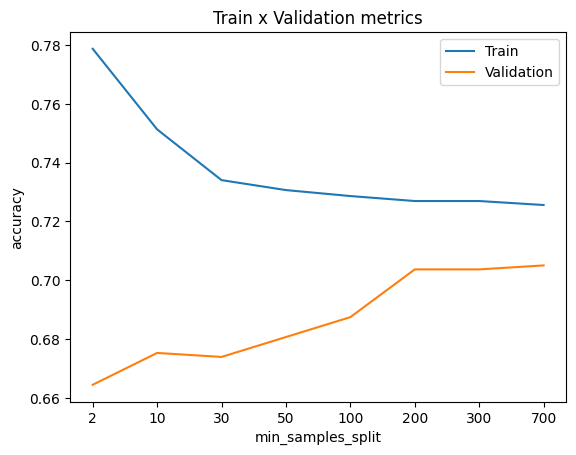

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

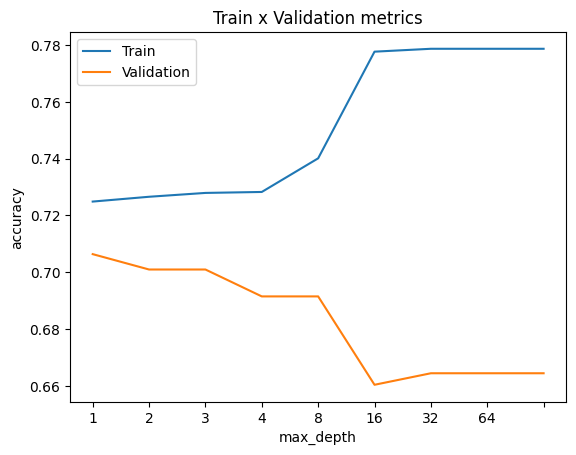

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 700,
                                             max_depth = 4,).fit(X_train,y_train)

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.7255
Metrics validation:
	Accuracy score: 0.7050


# Random Forest

Metrics train:
	Accuracy score: 0.7215
Metrics test:
	Accuracy score: 0.7199

In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

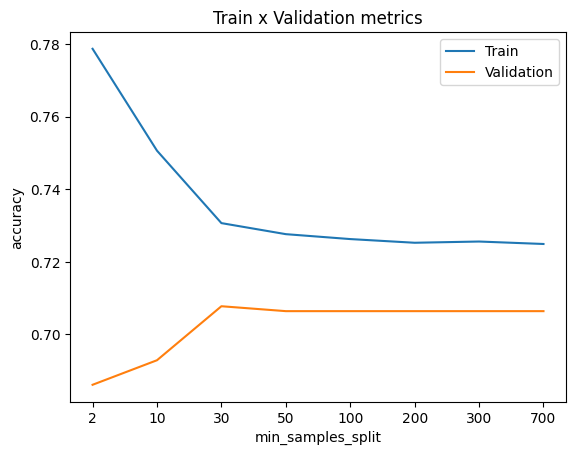

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

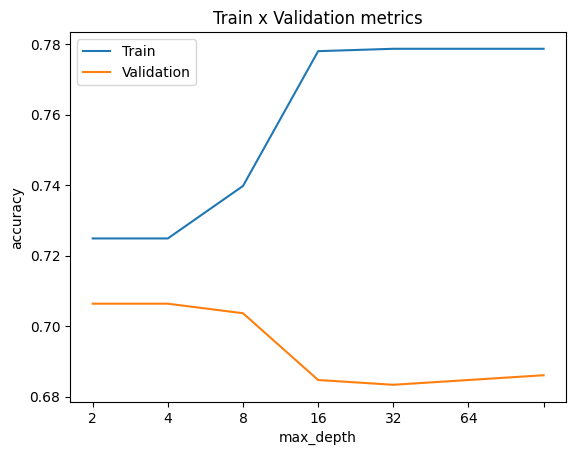

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

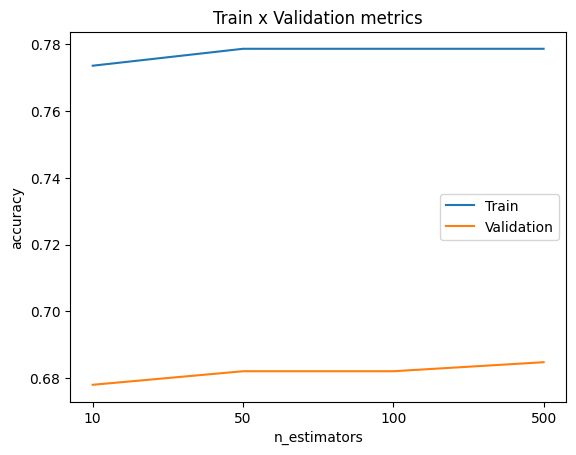

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 500,
                                             max_depth = 4,
                                             min_samples_split = 300).fit(X_train,y_train)

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.7249
Metrics test:
	Accuracy score: 0.7064


Note that we are searching for the best value one hyperparameter while leaving the other hyperparameters at their default values.

Ideally, we would want to check every combination of values for every hyperparameter that we are tuning.
If we have 3 hyperparameters, and each hyperparameter has 4 values to try out, we should have a total of 4 x 4 x 4 = 64 combinations to try.
When we only modify one hyperparameter while leaving the rest as their default value, we are trying 4 + 4 + 4 = 12 results.
To try out all combinations, we can use a sklearn implementation called GridSearchCV. GridSearchCV has a refit parameter that will automatically refit a model on the best combination so we will not need to program it explicitly. For more on GridSearchCV, please refer to its documentation.

# XGBoost

Metrics train:
	Accuracy score: 0.7252
Metrics test:
	Accuracy score: 0.7185

In [ ]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [ ]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [ ]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.59999
[1]	validation_0-logloss:0.59864
[2]	validation_0-logloss:0.59765
[3]	validation_0-logloss:0.59752
[4]	validation_0-logloss:0.59709
[5]	validation_0-logloss:0.59707
[6]	validation_0-logloss:0.59698
[7]	validation_0-logloss:0.59740
[8]	validation_0-logloss:0.59753
[9]	validation_0-logloss:0.59782
[10]	validation_0-logloss:0.59802
[11]	validation_0-logloss:0.59827
[12]	validation_0-logloss:0.59878
[13]	validation_0-logloss:0.59962
[14]	validation_0-logloss:0.59997
[15]	validation_0-logloss:0.60027


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_model.best_iteration

6

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.7249
Metrics test:
	Accuracy score: 0.7064
